In [2]:
%matplotlib inline
#import matplotlib
#matplotlib.use('tkAgg')
import numpy as np
import matplotlib.pyplot as plt
import potentials
import neighbors
from opinions import OpinionModel
import time
start = time.clock()

In [16]:
models = []
num_models = 50
#potential_values = np.linspace(0, 1, num_models)
for i in range(num_models):
    nsteps=200
    nagents=20
    #P = []
    #for i in range(nagents):
    #    arr = []
    #    for j in range(nagents):
    #        arr.append(-1)
    #    P.append(arr)
    neighbs = neighbors.totally_connected(nagents, self_connected=True)
    #neighbors = degree_connected(nagents, 1) #the second parameter ranges from 0 to 1, generates graphs of varying degrees of connectedness.
    linspaced = np.linspace(0, 1, nagents).tolist()
    opinions = [[i] for i in linspaced]
    #opinions = #[[np.random.rand()] for i in range(nagents)]
    #Also try potentials.tent(.5), potentials.tent(.3, .7), potentials.gaussian(), potentials.simple()...
    pots = [potentials.tent(.63) for i in range(nagents)]
    coupling = [[1]]
    model = OpinionModel(nagents, neighbs, opinions, pots, coupling, 'pairwise')
    models.append(model)

In [12]:
import cProfile
def fn():
    for model in models:
        model.ALPHA = .01
        model.run(nsteps)
cProfile.run('fn()')

         4397087 function calls in 12.930 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000   12.930   12.930 <ipython-input-12-3c05b1d62643>:2(fn)
        1    0.000    0.000   12.930   12.930 <string>:1(<module>)
    11000    0.438    0.000    0.618    0.000 datacollection.py:133(collect)
   335056    0.373    0.000    0.373    0.000 opinions.py:10(clamp)
    11000    0.045    0.000   12.913    0.001 opinions.py:186(step)
       50    0.017    0.000   12.930    0.259 opinions.py:193(run)
   220000    0.104    0.000    0.104    0.000 opinions.py:205(<lambda>)
   220000    0.586    0.000    0.646    0.000 opinions.py:53(reset)
   220000    3.605    0.000    9.623    0.000 opinions.py:57(pairwiseStep)
   178528    2.768    0.000    2.768    0.000 opinions.py:62(<listcomp>)
   335056    0.896    0.000    0.984    0.000 potentials.py:38(impl)
   209000    0.469    0.000    0.604    0.000 random.py:220

In [13]:
def fn2():
    agent_opinions = []
    for model in models:
        agent_opinion = model.datacollector.get_agent_vars_dataframe()
        agent_opinions.append(agent_opinion)
cProfile.run('fn2()')

         1408354 function calls (1407354 primitive calls) in 3.741 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     1500    0.002    0.000    0.007    0.000 <frozen importlib._bootstrap>:996(_handle_fromlist)
        1    0.113    0.113    3.740    3.740 <ipython-input-13-fb5b18aa0773>:1(fn2)
        1    0.001    0.001    3.741    3.741 <string>:1(<module>)
       50    0.000    0.000    0.000    0.000 __init__.py:120(lzip)
   220450    0.287    0.000    0.443    0.000 __init__.py:177(iteritems)
      150    0.000    0.000    0.004    0.000 _methods.py:37(_any)
      100    0.000    0.000    0.003    0.000 _methods.py:40(_all)
      100    0.000    0.000    0.000    0.000 _validators.py:220(validate_bool_kwarg)
      100    0.001    0.000    0.008    0.000 algorithms.py:132(_reconstruct_data)
      100    0.000    0.000    0.001    0.000 algorithms.py:1337(_get_take_nd_function)
      100    0.007    0.000    0.034    

       50    0.000    0.000    0.000    0.000 internals.py:303(dtype)
       50    0.000    0.000    0.000    0.000 internals.py:307(ftype)
       50    0.000    0.000    0.000    0.000 internals.py:3296(is_consolidated)
       50    0.000    0.000    0.001    0.000 internals.py:3304(_consolidate_check)
       50    0.000    0.000    0.001    0.000 internals.py:3305(<listcomp>)
       50    0.000    0.000    0.000    0.000 internals.py:3576(_consolidate_inplace)
       50    0.001    0.000    0.046    0.001 internals.py:4306(create_block_manager_from_arrays)
       50    0.003    0.000    0.033    0.001 internals.py:4317(form_blocks)
       50    0.001    0.000    0.010    0.000 internals.py:4441(_multi_blockify)
       50    0.000    0.000    0.000    0.000 internals.py:4445(<lambda>)
       50    0.002    0.000    0.004    0.000 internals.py:4473(_stack_arrays)
       50    0.000    0.000    0.000    0.000 internals.py:4476(_asarray_compat)
       50    0.000    0.000    0.000    0.0

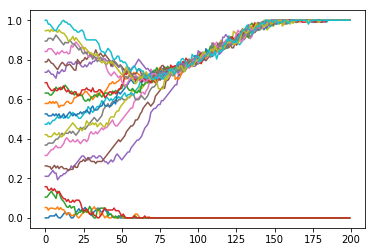

In [17]:
for model in models:
    model.ALPHA = .01
    model.run(nsteps)
agent_opinions = []
for model in models:
    agent_opinion = model.datacollector.get_agent_vars_dataframe()
    agent_opinions.append(agent_opinion)
x=agent_opinions[0].Opinion0.as_matrix().reshape((nsteps, nagents))
plt.plot(x);

In [18]:
from analysis import opinions_clusters
from analysis import num_clusters
sum = 0
for i in range(num_models):
    for j in range(len(opinions[0])):
        print("Model %d Opinion %d:" % (i, j))
        print(num_clusters(models[i], .4)[j])
        sum += num_clusters(models[i], .4)[j]

print(sum)
print("average: %f" %(float(sum) / float(num_models)))
#len(opinions_clusters(models[0])[0])

Model 0 Opinion 0:
2
Model 1 Opinion 0:
1
Model 2 Opinion 0:
1
Model 3 Opinion 0:
1
Model 4 Opinion 0:
1
Model 5 Opinion 0:
1
Model 6 Opinion 0:
2
Model 7 Opinion 0:
1
Model 8 Opinion 0:
1
Model 9 Opinion 0:
1
Model 10 Opinion 0:
2
Model 11 Opinion 0:
2
Model 12 Opinion 0:
2
Model 13 Opinion 0:
1
Model 14 Opinion 0:
2
Model 15 Opinion 0:
1
Model 16 Opinion 0:
1
Model 17 Opinion 0:
1
Model 18 Opinion 0:
2
Model 19 Opinion 0:
1
Model 20 Opinion 0:
1
Model 21 Opinion 0:
2
Model 22 Opinion 0:
2
Model 23 Opinion 0:
1
Model 24 Opinion 0:
2
Model 25 Opinion 0:
1
Model 26 Opinion 0:
2
Model 27 Opinion 0:
1
Model 28 Opinion 0:
2
Model 29 Opinion 0:
1
Model 30 Opinion 0:
2
Model 31 Opinion 0:
1
Model 32 Opinion 0:
1
Model 33 Opinion 0:
1
Model 34 Opinion 0:
1
Model 35 Opinion 0:
1
Model 36 Opinion 0:
2
Model 37 Opinion 0:
2
Model 38 Opinion 0:
2
Model 39 Opinion 0:
1
Model 40 Opinion 0:
2
Model 41 Opinion 0:
1
Model 42 Opinion 0:
2
Model 43 Opinion 0:
2
Model 44 Opinion 0:
1
Model 45 Opinion 0:


In [72]:
print("Time taken (.seconds): ")
print(time.clock() - start)

Time taken (.seconds): 
23.518944000000005


In [48]:
num_models
linspaced = np.linspace(0, 1, nagents).tolist()
linspaced

[0.0,
 0.05263157894736842,
 0.10526315789473684,
 0.15789473684210525,
 0.21052631578947367,
 0.2631578947368421,
 0.3157894736842105,
 0.3684210526315789,
 0.42105263157894735,
 0.47368421052631576,
 0.5263157894736842,
 0.5789473684210527,
 0.631578947368421,
 0.6842105263157894,
 0.7368421052631579,
 0.7894736842105263,
 0.8421052631578947,
 0.894736842105263,
 0.9473684210526315,
 1.0]

average: 1.400000 for tau: 0.630000


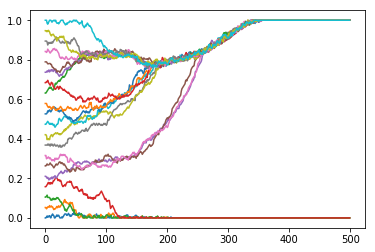

In [14]:

tau = .63
while tau > .4:
    models = []
    num_models = 10
    #potential_values = np.linspace(0, 1, num_models)
    for i in range(num_models):
        nsteps=500
        nagents=20
        #P = []
        #for i in range(nagents):
        #    arr = []
        #    for j in range(nagents):
        #        arr.append(-1)
        #    P.append(arr)
        neighbs = neighbors.totally_connected(nagents, self_connected=True)
        #neighbors = degree_connected(nagents, 1) #the second parameter ranges from 0 to 1, generates graphs of varying degrees of connectedness.
        linspaced = np.linspace(0, 1, nagents).tolist()
        opinions = [[i] for i in linspaced]
        #opinions = [[np.random.rand()] for i in range(nagents)]
        #Also try potentials.tent(.5), potentials.tent(.3, .7), potentials.gaussian(), potentials.simple()...
        pots = [potentials.tent(tau) for i in range(nagents)]
        coupling = [[1]]
        model = OpinionModel(nagents, neighbs, None, opinions, pots, coupling, 'pairwise')
        models.append(model)
    for model in models:
        model.ALPHA = .005
        model.run(nsteps)
    agent_opinions = []
    for model in models:
        agent_opinion = model.datacollector.get_agent_vars_dataframe()
        agent_opinions.append(agent_opinion)
    x=agent_opinions[0].Opinion0.as_matrix().reshape((nsteps, nagents))
    plt.plot(x);
    from analysis import opinions_clusters
    from analysis import num_clusters
    sum = 0
    for i in range(num_models):
        for j in range(len(opinions[0])):
            #print("Model %d Opinion %d:" % (i, j))
            #print(num_clusters(models[i], .4)[j])
            sum += num_clusters(models[i], .4)[j]

    #print(sum)
    print("average: %f for tau: %f" %(float(sum) / float(num_models), tau))
    tau = .4

In [3]:
from opinions import OpinionAgentParameters
from opinions import OpinionAgent
point_5 = lambda a: .5
a = OpinionAgent(OpinionAgentParameters(0, model, [[1],[0]], potentials.tent(.5), [1, 1]))
print(len(a.weights))
print(len(a.model.schedule.agents))
model

NameError: name 'model' is not defined